In [1]:
import pandas as pd
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/austi/Documents/QTW/Case Study 6/all_train.csv.gz', compression='gzip')

df.head()

,# label,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f18,f19,f20,f21,f22,f23,f24,f25,f26,mass
0,1.0,-0.346368,0.416306,0.999236,0.475342,0.427493,-0.005984,1.989833,0.344530,1.566297,...,4.105282,0.267826,0.378718,1.743123,3.406367,4.350537,-0.352571,1.130032,2.227706,1000.0
1,1.0,1.708236,-0.319394,-1.241873,-0.887231,-0.871906,-0.005984,-0.001047,-1.038225,0.655748,...,-1.178141,-0.877361,-1.483769,-0.573682,-1.693781,-0.545062,-0.299118,-0.662942,-0.193019,750.0
2,0.0,-0.360693,1.794174,0.264738,-0.472273,-0.292344,-1.054221,-1.150495,1.423404,1.270098,...,-1.199511,0.539020,-1.590629,-0.573682,-0.543636,-0.937456,-0.300344,-0.523262,-1.506304,750.0
3,1.0,-0.377914,-0.103932,-0.649434,-2.125015,-1.643797,-0.005984,1.011112,-1.040340,-0.541991,...,0.463763,-0.006583,1.089122,-0.573682,-0.276348,-0.409272,-0.349926,-0.307123,0.529698,1250.0
4,0.0,-0.067436,-0.636762,-0.620166,-0.062551,1.588715,-0.005984,-0.595304,-1.238987,0.336844,...,-0.552837,-1.418494,-0.562982,1.743123,0.881802,0.002516,1.560950,-0.150760,-1.023889,750.0


In [3]:
df

,# label,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f18,f19,f20,f21,f22,f23,f24,f25,f26,mass
0,1.0,-0.346368,0.416306,0.999236,0.475342,0.427493,-0.005984,1.989833,0.344530,1.566297,...,4.105282,0.267826,0.378718,1.743123,3.406367,4.350537,-0.352571,1.130032,2.227706,1000.000000
1,1.0,1.708236,-0.319394,-1.241873,-0.887231,-0.871906,-0.005984,-0.001047,-1.038225,0.655748,...,-1.178141,-0.877361,-1.483769,-0.573682,-1.693781,-0.545062,-0.299118,-0.662942,-0.193019,750.000000
2,0.0,-0.360693,1.794174,0.264738,-0.472273,-0.292344,-1.054221,-1.150495,1.423404,1.270098,...,-1.199511,0.539020,-1.590629,-0.573682,-0.543636,-0.937456,-0.300344,-0.523262,-1.506304,750.000000
3,1.0,-0.377914,-0.103932,-0.649434,-2.125015,-1.643797,-0.005984,1.011112,-1.040340,-0.541991,...,0.463763,-0.006583,1.089122,-0.573682,-0.276348,-0.409272,-0.349926,-0.307123,0.529698,1250.000000
4,0.0,-0.067436,-0.636762,-0.620166,-0.062551,1.588715,-0.005984,-0.595304,-1.238987,0.336844,...,-0.552837,-1.418494,-0.562982,1.743123,0.881802,0.002516,1.560950,-0.150760,-1.023889,750.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6999995,0.0,1.617264,-0.537084,-1.275867,0.650799,-1.511621,0.850488,0.596391,-0.054678,0.728849,...,0.664328,-0.960709,-0.894011,1.743123,-0.426198,-0.324286,-0.432739,1.340297,0.267774,750.000000
6999996,0.0,-0.511357,0.270927,0.085989,-0.243802,-1.035668,-0.005984,-0.127219,0.721426,1.404479,...,-1.015462,1.367217,-1.053815,-0.573682,-1.907798,0.194661,-0.190621,0.027776,-0.316018,1250.000000
6999997,1.0,0.062408,-0.987203,0.570667,1.517195,0.639548,-1.054221,1.115239,1.261928,-1.009308,...,0.790842,0.892545,-0.192816,-0.573682,0.973622,1.034964,-0.340661,-0.181193,1.877042,1500.000000
6999998,1.0,1.659131,1.096223,0.562821,1.627193,0.767236,-1.054221,1.079999,0.155488,-1.412207,...,-0.671423,-0.308908,-0.568336,-0.573682,1.043119,1.270350,0.217405,0.120213,1.073020,1500.000000


In [4]:
df['# label'].value_counts()

# label
1.0    3500879
0.0    3499121
Name: count, dtype: int64

In [5]:
label_column_name = '# label'  

X = df.drop(columns=[label_column_name])
y = df[label_column_name].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [23]:

# takes ~20 min
callback = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 3)

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (X_train.shape[1],)),
    tf.keras.layers.Dense(128, activation = 'relu'),  
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid') # sigmoidd is good for binary clasification
])


model.compile(optimizer = 'adam', 
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])


model.fit(X_train, 
          y_train,
          epochs = 10,
          batch_size = 64,
          callbacks = [callback], 
          validation_data = (X_test, y_test))

# accuracy maintains around 87% in the first epoch

Epoch 1/10
87500/87500 [==============================] - 240s 3ms/step - loss: 0.2917 - accuracy: 0.8665 - val_loss: 0.2765 - val_accuracy: 0.8752
Epoch 2/10
87500/87500 [==============================] - 232s 3ms/step - loss: 0.2832 - accuracy: 0.8713 - val_loss: 0.2746 - val_accuracy: 0.8774
Epoch 3/10
87500/87500 [==============================] - 230s 3ms/step - loss: 0.2812 - accuracy: 0.8728 - val_loss: 0.2741 - val_accuracy: 0.8783
Epoch 4/10
87500/87500 [==============================] - 233s 3ms/step - loss: 0.2802 - accuracy: 0.8733 - val_loss: 0.2739 - val_accuracy: 0.8785
Epoch 5/10
87500/87500 [==============================] - 231s 3ms/step - loss: 0.2794 - accuracy: 0.8737 - val_loss: 0.2786 - val_accuracy: 0.8786
Epoch 6/10
87500/87500 [==============================] - 232s 3ms/step - loss: 0.2788 - accuracy: 0.8741 - val_loss: 0.2716 - val_accuracy: 0.8786
Epoch 7/10
87500/87500 [==============================] - 232s 3ms/step - loss: 0.2784 - accuracy: 0.8744 - val_

In [24]:
loss, accuracy = model.evaluate(X_test, y_test)

print(f"Test Accuracy: {accuracy * 100:.2f}%")

43750/43750 [==============================] - 65s 1ms/step - loss: 0.2710 - accuracy: 0.8795
Test Accuracy: 87.95%


In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               3712      
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 128)               16512     
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 28,545
Trainable params: 28,545
Non-trai

In [26]:

y_pred = model.predict(X_test)
y_pred = np.round(y_pred).flatten()

conf_matrix = confusion_matrix(y_test, y_pred)

print('Confusion Matrix:')
print(conf_matrix)

43750/43750 [==============================] - 54s 1ms/step
Confusion Matrix:
[[596237 102914]
 [ 65800 635049]]


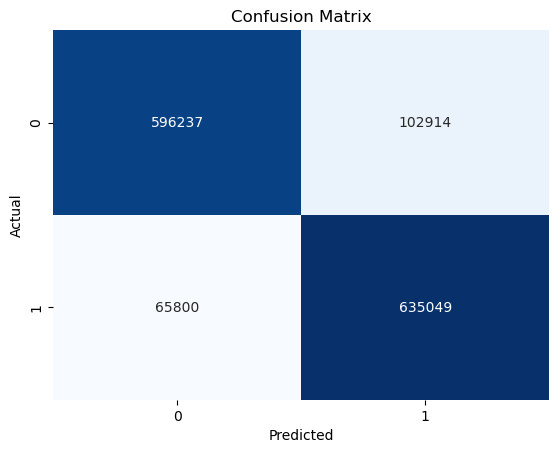

In [27]:
sns.heatmap(conf_matrix, 
            annot = True,
            fmt = 'd',
            cmap = 'Blues',
            cbar = False,
            xticklabels = ['0', '1'],
            yticklabels = ['0', '1'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.show()

In [28]:
### Should we train a random forest like capstone then run again on best features??